In [1]:
# Raw data converter file

# Notebook used to pre-process the raw data and see if everything is correct before processing them and
# use them.
# The inter-prism and inter-GPS distance are needed.

In [15]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

### Protocol not validated ###

# Switch values if necessary 1 11 2021
#Dist_prism_12 = 1.0398341231585624*1000
#Dist_prism_13 = 0.818424700118086*1000
#Dist_prism_23 = 0.8806156053859284*1000
#Dist_GPS_12 = 0.835637436093363*1000
#Dist_GPS_13 = 0.7812173648662254*1000
#Dist_GPS_23 = 0.5166745729506486*1000

# 26 11 2021
#Dist_prism_12 = 1.03688797895733
#Dist_prism_13 = 0.822536135483593
#Dist_prism_23 = 0.8783765747673403
#Dist_GPS_12 = 0.7828618536473139
#Dist_GPS_13 = 0.8394208131018045
#Dist_GPS_23 = 0.5176447366930409

# 31 01 2022
#Dist_prism_12 = 1.038854051807371
#Dist_prism_13 = 0.8202157646292075
#Dist_prism_23 = 0.879788333022114
#Dist_GPS_12 = 0.7830826912858335
#Dist_GPS_13 = 0.8418404054627937
#Dist_GPS_23 = 0.5172558618541933
     
# 03 02 2022
#Dist_prism_12 = 1.0403741344089559
#Dist_prism_13 = 0.8239475424257701
#Dist_prism_23 = 0.8766711748547112
#Dist_GPS_12 = 0.781661929058067
#Dist_GPS_13 = 0.8353981332464246
#Dist_GPS_23 = 0.5174987476948135

# 17 02 2022 / 24 02 2022
#Dist_prism_12 = 1.0377436460567973
#Dist_prism_13 = 0.8262903370535766
#Dist_prism_23 = 0.8882613537922258
#Dist_GPS_12 = 0.7809786915630756
#Dist_GPS_13 = 0.8378323585433202
#Dist_GPS_23 = 0.5191788936274444

### Protocol validated ###

# 07 03 2022
#Dist_prism_12 = 0.8832836583456264
#Dist_prism_13 = 0.8247449387008166
#Dist_prism_23 = 1.039409793600046
#Dist_GPS_12 = 0.7781099344563802
#Dist_GPS_13 = 0.8431026980109139
#Dist_GPS_23 = 0.5157221841320069

# 12 03 2022
#Dist_prism_12 = 0.8860734460339026
#Dist_prism_13 = 0.8303896290142598
#Dist_prism_23 = 1.0393117663247973
#Dist_GPS_12 = 0.7829424296161074
#Dist_GPS_13 = 0.8415176433032493
#Dist_GPS_23 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
#Dist_prism_12 = 0.8873171656784946
#Dist_prism_13 = 0.8272212117473343
#Dist_prism_23 = 1.0379270641796363
#Dist_GPS_12 = 0.7829081036179948
#Dist_GPS_13 = 0.8424633975958637
#Dist_GPS_23 = 0.5165807364575292

# 31 03 2022
#Dist_prism_12 = 0.8873171656784946
#Dist_prism_13 = 0.8272212117473343
#Dist_prism_23 = 1.0379270641796363
#Dist_GPS_12 = 0.7829081036179948
#Dist_GPS_13 = 0.8424633975958637
#Dist_GPS_23 = 0.5165807364575292

# 27 04 2022
#Dist_prism_12 = 0.8856608085851714
#Dist_prism_13 = 0.8264452483880412
#Dist_prism_23 = 1.0384219210289538
#Dist_GPS_12 = 0.7809547832390561
#Dist_GPS_13 = 0.8259590286006459
#Dist_GPS_23 = 0.5191274645630007  

# 27 04 2022 soir
#Dist_prism_12 = 0.8868846942534616
#Dist_prism_13 = 0.829169129877633
#Dist_prism_23 = 1.0387571594276301
#Dist_GPS_12 = 0.7837749633840095
#Dist_GPS_13 = 0.8323125081688734
#Dist_GPS_23 = 0.5187055120945835

# 05 05 2022
#Dist_prism_12 = 0.3819811991689936
#Dist_prism_13 = 0.4426382054042266
#Dist_prism_23 = 0.2564685508415531

# 13 05 2022
#Dist_prism_12 = 0.8113569618671205
#Dist_prism_13 = 0.8695313906832193
#Dist_prism_23 = 1.0383292631343506
#Dist_GPS_12 = 0.7800801192552722
#Dist_GPS_13 = 0.8396027021467387
#Dist_GPS_23 = 0.5157656903777014

# 23 05 2022
#Dist_prism_12 = 0.3851913749758221
#Dist_prism_13 = 0.4433899497583272
#Dist_prism_23 = 0.25861327466684897

# 22 06 2022
#Dist_prism_12 = 0.7359204697527427
#Dist_prism_13 = 0.9055056357941131
#Dist_prism_23 = 1.0268390664025775
#Dist_GPS_12 = 0.7818105926683322
#Dist_GPS_13 = 0.8536205673813737
#Dist_GPS_23 = 0.5068640574720596

# 30 06 2022
#Dist_prism_12 = 0.7297583705742492
#Dist_prism_13 = 0.9060320633355149
#Dist_prism_23 = 1.0319114860615324
#Dist_GPS_12 = 0.7844037235850999
#Dist_GPS_13 = 0.8443517677165984
#Dist_GPS_23 = 0.515075228247105

# 11 07 2022
Dist_prism_12 = 0.7290056530579362
Dist_prism_13 = 0.906995998154099
Dist_prism_23 = 1.029264651249632
#Dist_GPS_12 = 0.7825177240721779
#Dist_GPS_13 = 0.8446820009426457
#Dist_GPS_23 = 0.5145776023584968   

Average error during the calibration:  2.275 mm


<IPython.core.display.Javascript object>


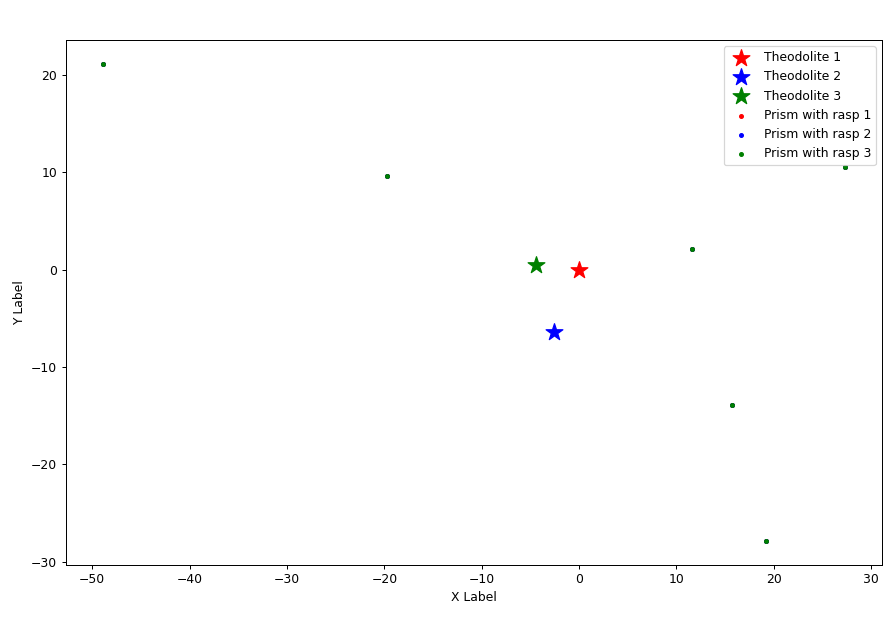

In [24]:
# Function used to show the resection accuracy

%matplotlib notebook
# Read markers file of grand axe and show them
tfu = importlib.reload(tfu)
ttfu = importlib.reload(ttfu)
#file_name = './data/total_station/20201201/theodolite_reference_markers_01-12-2020__16-55-50.txt'
#file_name = './data/total_station/20201202/theodolite_reference_markers_02-12-2020__11-23-55.txt'
file_name = './data/total_station/20201203/theodolite_reference_markers_03-12-2020__10-10-20.txt'
#file_name = './data/total_station/20210222/theodolite_reference_markers_22-02-2021__15-22-08.txt'
#file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/20211116/2021_11_16_theodolite_reference_prisms.txt'
#file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/theodolite_reference_prisms_24_01_22_2.txt'
#file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/20220203_prisms_calibration/theodolite_reference_prisms.txt'
#file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/20220210_TR/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220217/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220307/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220312/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220314/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220316/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-1/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220427/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220427_soir/theodolite_reference_prisms_2.txt'
#file_name = './data/total_station/20220505_cones/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220513_morning_lidar/theodolite_reference_prisms_2.txt'
#file_name = './data/total_station/20220523/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220525/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220622-1/theodolite_reference_prisms_2.txt'
#file_name = './data/total_station/20220630-1/theodolite_reference_prisms_without_first_two.txt'
#file_name = './data/total_station/20220711/theodolite_reference_prisms_all.txt'
#file_name = './data/total_station/20220715/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220717/theodolite_reference_prisms.txt'

trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1, 1)

#T_1_grand = np.identity(4)
#T_2_grand = np.identity(4)
#T_3_grand = np.identity(4)

tp1 = T_1_grand@trimble_1
tp2 = T_2_grand@trimble_2
tp3 = T_3_grand@trimble_3

save_tf = False
name_file = './data/calibration/tf_manual_resection/20220513_morning_tf_m.csv'
if(save_tf):
    ttfu.save_tf(T_1_grand, T_2_grand, T_3_grand, name_file)
#print(T_1_grand)
#print(T_2_grand)
#print(T_3_grand)

error = []
for i,j,k in zip(tp1,tp2,tp3):
    dist_12 = np.linalg.norm(i-j)
    dist_13 = np.linalg.norm(i-k)
    dist_23 = np.linalg.norm(k-j)
    error.append(dist_12)
    error.append(dist_13)
    error.append(dist_23)
print("Average error during the calibration: ", round(np.mean(error)*1000,3), "mm")

tfu.plot_trajectories_prism(3, tp1, tp2, tp3, T_1_grand, T_2_grand, T_3_grand, 0, 0,"example.pdf",1)

Number of data for theodolites: [1179 1100 1182]
Bad measures: 1307


<IPython.core.display.Javascript object>


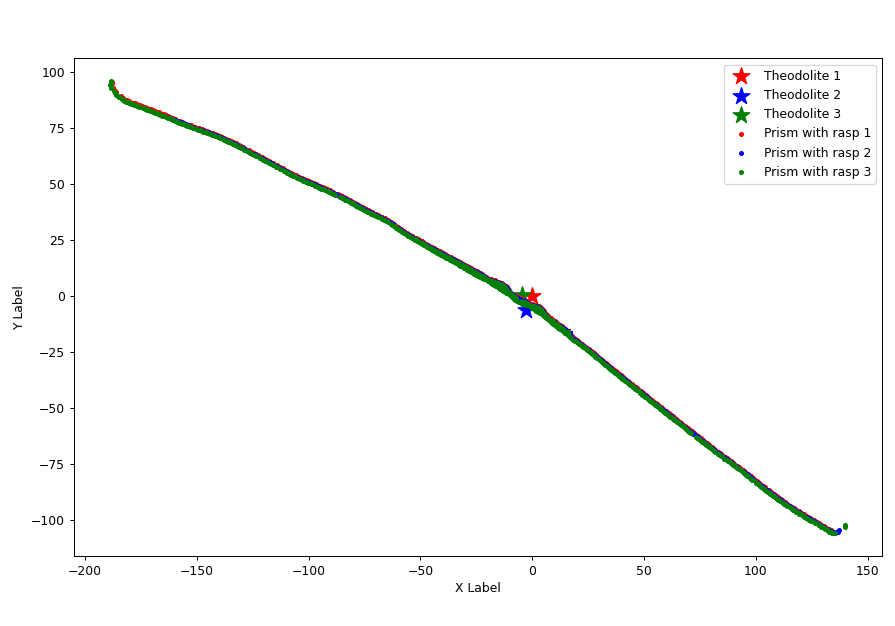

Conversion done !
Conversion done !
Conversion done !


In [25]:
# Read rosbag of grand axe and show the trajectory
tfu = importlib.reload(tfu)

# 07 10 2020
#file = '/home/norlab/Data/IROS_2022/20201007_Foret/2020-10-08-11-57-30_one_prism_continuous_mapping_quarry1_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20201007_Foret/2020-10-08-12-14-23_three_prism_continuos_mapping_quarry2_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20201007_Foret/2020-10-08-17-58-38_ski_trail_continuous_motion_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20201007_Foret/2020-10-08-18-01-19_ski_trail_start_stop_motion_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20201007_Foret/2020-10-08-18-05-08_ski_trail_start_stop_straight_segment_filtered.bag'

# 01 12 2020
#file = '/home/norlab/Data/IROS_2022/20201201_Foret/2020-12-01-17-29-01_theodolite.bag'
#file = '/home/norlab/Data/IROS_2022/20201201_Foret/2020-12-01-18-00-21_theodolite.bag'
#file = '/home/norlab/Data/IROS_2022/20201201_Foret/2020-12-01-18-15-43_theodolite.bag'

# 02 12 2020
#file = '/home/norlab/Data/IROS_2022/20201202_Foret/2020-12-02-11-37-05_theodolite.bag'
#file = '/home/norlab/Data/IROS_2022/20201202_Foret/2020-12-02-12-28-41_theodolite.bag'

# 03 12 2020
file = '/home/norlab/Data/IROS_2022/20201203_Foret/2020-12-03-10-21-59_theodolite.bag'

# 22 02 2021
#file= '/home/norlab/Data/IROS_2022/20210222_Foret/2021-02-22-15-43-34_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20210222_Foret/2021-02-22-15-50-23_filtered.bag'
#file = '/home/norlab/Data/IROS_2022/20210222_Foret/2021-02-22-16-01-10_filtered.bag'

# 16 11 2021
# small loop 1
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20211116/2021-11-16-15-05-36_filtered.bag"
# small loop 2
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20211116/2021-11-16-15-13-53_filtered.bag"
# long bag
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20211116/2021-11-16-15-20-59_filtered.bag"
# short bag end
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20211116/2021-11-16-16-15-00_filtered.bag"

# 24 01 22
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/2022-01-24-15-49-38_filtered.bag"
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/2022-01-24-16-05-42_filtered.bag"

# 03 02 22
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/2022-02-03-10-59-53.bag"
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/2022-02-03-11-29-07.bag"
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/2022-02-03-11-44-13.bag"
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/2022-02-03-11-54-31.bag"

# 10 02 22
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220210_TR/2022-02-10-11-20-52_filtered.bag"

# 17 02 22
#file = "/home/norlab/2022-02-17-11-01-07.bag"

# 24 02 22
#file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"

# 07 03 22
#file = "/media/norlab/Samsung_disk/20220307_TS/2022-03-07-19-20-06.bag"

# 12 03 22
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"

# 14 03 22
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"

# 16 03 22
#file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"

# 31 03 22
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag"  # Tree experiments
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"

# 27 04 22
#file = "/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag"

# 27 04 22 soir
#file = "/home/norlab/Data/IROS_2022/20220427_TS_2/2022-04-27-22-33-19_filtered.bag"

# 05 05 22 empty 
#file = "/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag"

# 05 05 22 cones 
#file = "/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag"

# 13 05 22
#file = "/home/norlab/Data/IROS_2022/20220513_TS/2022-05-13-10-30-37_filtered.bag"
#file = "/home/norlab/Data/IROS_2022/20220513_TS/2022-05-13-11-01-56.bag"
#file = "/home/norlab/Data/IROS_2022/20220513_TS/2022-05-13-11-24-28.bag"

# 23 05 22 
#file = "/home/norlab/Data/IROS_2022/20220523_TS/constrained_2022-05-23-18-56-16.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/cones_filtered_2022-05-23-19-31-32.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/empty_filtered_2022-05-23-19-18-35.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/other_tunnel_2022-05-23-19-39-40.bag"

# 25 05 22
#file = "/home/norlab/Data/IROS_2022/20220525_TS/2022-05-25-11-07-40.bag"
#file = "/home/norlab/Data/IROS_2022/20220525_TS/2022-05-25-13-32-32.bag"

# 22 06 22
#file = "/home/norlab/Data/IROS_2022/20220622_TS/2022-06-22-17-48-25.bag"
#file = "/home/norlab/Data/IROS_2022/20220622_TS/2022-06-22-18-11-00.bag"

# 30 06 22
#file = '/home/norlab/Data/IROS_2022/20220630_TS/2022-06-30-10-32-21.bag'
#file = '/home/norlab/Data/IROS_2022/20220630_TS/2022-06-30-10-57-07.bag'

# 11 07 22
#file = '/home/norlab/Data/IROS_2022/20220711_TS/2022-07-11-15-50-00.bag'

# 19 07 22
#file = '/media/norlab/Samsung_disk/hq_11h10_second_follow_good_2022-07-19-11-11-35_filtered.bag'
#file = '/media/norlab/Samsung_disk/hq_11h35_follow_new_params_2022-07-19-11-35-21_filtered.bag'

Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T

%matplotlib notebook
# Variable to plot in 3d, 0 = 2D, 1 = 3D
plot_3d = 0
# Variable to save file in pdf
save_pdf = 0
# file name to save plot in pdf
file_pdf = "./figs/23_05_22_constrained_18_56.pdf"
#file_pdf = "./figs/31-03-2022.jpg"

tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, plot_3d, save_pdf, file_pdf, 1)

# Convert point data to csv file
ttfu = importlib.reload(ttfu)

# Trajectory total station (time, point data) x3
ttfu.Convert_datap_to_csv(time_trimble_1, np.array(trimble_1).T, "./data/total_station/trimble1.csv")
ttfu.Convert_datap_to_csv(time_trimble_2, np.array(trimble_2).T, "./data/total_station/trimble2.csv")
ttfu.Convert_datap_to_csv(time_trimble_3, np.array(trimble_3).T, "./data/total_station/trimble3.csv")

In [17]:
thresold_d = 2                 # m/s
thresold_a = 1                 # deg/s
thresold_e = 1 
limit_time_interval = 1        # s
t1, t2, t3, tp1, tp2, tp3, d1, d2, d3, a1, a2, a3, e1, e2, e3 = tfu.read_rosbag_theodolite_without_tf_raw_data_pre_filtered(file)
index_1_f = tfu.thresold_raw_data(t1, d1, a1, e1, thresold_d, thresold_a*3.1415926/180, thresold_e*3.1415926/180, limit_time_interval)
index_2_f = tfu.thresold_raw_data(t2, d2, a2, e2, thresold_d, thresold_a*3.1415926/180, thresold_e*3.1415926/180, limit_time_interval)
index_3_f = tfu.thresold_raw_data(t3, d3, a3, e3, thresold_d, thresold_a*3.1415926/180, thresold_e*3.1415926/180, limit_time_interval)
t1 = t1[index_1_f]
t2 = t2[index_2_f]
t3 = t3[index_3_f]
tp1 = tp1[index_1_f].T
tp2 = tp2[index_2_f].T
tp3 = tp3[index_3_f].T
tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, plot_3d, save_pdf, file_pdf, 1)

Number of data for theodolites: [312 371 414]
Bad measures: 1215


<IPython.core.display.Javascript object>


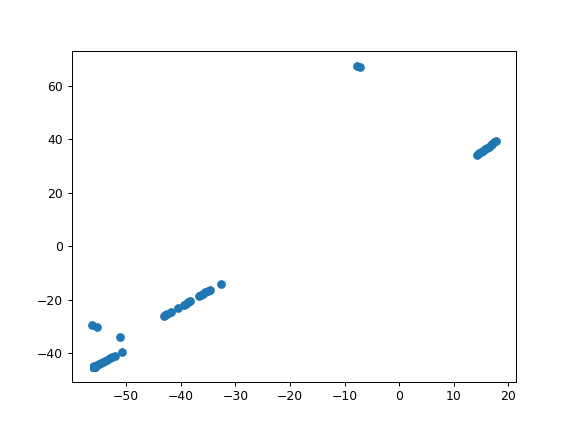

[[-5.59298439e+01 -5.59298762e+01 -5.59284304e+01 -5.59283759e+01
  -5.59287855e+01 -5.59289661e+01 -5.59288005e+01 -5.59286107e+01
  -5.59283920e+01 -5.59289935e+01 -5.59290322e+01 -5.59292140e+01
  -5.59287596e+01 -5.59282202e+01 -5.59283109e+01 -5.59279174e+01
  -5.59287011e+01 -5.59281445e+01 -5.59280725e+01 -5.59279808e+01
  -5.59284504e+01 -5.59284920e+01 -5.59292728e+01 -5.59291772e+01
  -5.59323081e+01 -5.59279609e+01 -5.59291514e+01 -5.59288661e+01
  -5.59286391e+01 -5.59291509e+01 -5.59289016e+01 -5.59288820e+01
  -5.59286568e+01 -5.59287481e+01 -5.59286499e+01 -5.59286437e+01
  -5.59286712e+01 -5.59286800e+01 -5.59289736e+01 -5.59289848e+01
  -5.59290763e+01 -5.59284224e+01 -5.59289529e+01 -5.59291061e+01
  -5.59289895e+01 -5.59291556e+01 -5.59286730e+01 -5.59286756e+01
  -5.59287481e+01 -5.59291293e+01 -5.59292969e+01 -5.59297458e+01
  -5.59295210e+01 -5.59298656e+01 -5.59299898e+01 -5.59301715e+01
  -5.59303398e+01 -5.59301821e+01 -5.59300965e+01 -5.59297680e+01
  -5.59296

In [19]:
plt.figure(0)
plt.scatter(tp1[0,:], tp1[1,:])

In [2]:
# Read GPS data and compute the inter-distance between them
tfu = importlib.reload(tfu)
ttfu = importlib.reload(ttfu)

# 16 11 2021
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/front_raw_202111162046.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/back_raw_202111161917.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/middle_raw_202111162046.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 31 01 2022
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/gps/front/reach-raw_202201241823_UBX/reach-raw_202201241823.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/gps/back/raw_202201241823_UBX/raw_202201241823.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220124_TR/gps/middle/reach_raw_202201241823_UBX/reach_raw_202201241823.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 03 02 2022
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/20220203-gps/front/reach-raw_202202031557_UBX/reach-raw_202202031557.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/20220203-gps/back/raw_202202031556_UBX/raw_202202031556.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220203_data/20220203-gps/middle/reach_raw_202202031556_UBX/reach_raw_202202031556.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 10 02 2022
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220210_TR/20220210-gps/front/reach-raw_202202101446_UBX/reach-raw_202202101446.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220210_TR/20220210-gps/back/raw_202202101446_UBX/raw_202202101446.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220210_TR/20220210-gps/middle/reach_raw_202202101447_UBX/reach_raw_202202101447.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 17 02 2022
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220217_data/20220217_gps/front/reach-raw_202202171521_UBX/reach-raw_202202171521.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220217_data/20220217_gps/back/raw_202202171521_UBX/raw_202202171521.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/20220217_data/20220217_gps/middle/reach_raw_202202171521_UBX/reach_raw_202202171521.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 24 02 2022
#name_file = "/home/norlab/Data/IROS_2022/20220224_TS/20220224_gps/front/reach-raw_202202241910_UBX/reach-raw_202202241910.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220224_TS/20220224_gps/back/raw_202202241910_UBX/raw_202202241910.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220224_TS/20220224_gps/middle/Reach_raw_202202241910_UBX/Reach_raw_202202241910.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 07 03 2022
#name_file = "/home/norlab/Data/IROS_2022/20220307_TS/20220307_gps/front/reach-raw_202203072326_UBX/reach-raw_202203072326.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220307_TS/20220307_gps/back/raw_202203072326_UBX/raw_202203072326.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220307_TS/20220307_gps/middle/reach_raw_202203072327_UBX/reach_raw_202203072327.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 12 03 2022
#name_file = "/home/norlab/Data/IROS_2022/20220312_TS/20220312_gps/front/reach-raw_202203121411_UBX/reach-raw_202203121411.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220312_TS/20220312_gps/back/raw_202203121411_UBX/raw_202203121411.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220312_TS/20220312_gps/middle/reach_raw_202203121411_UBX/reach_raw_202203121411.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 14 03 2022
name_file = "/home/norlab/Data/IROS_2022/20220314_TS/20220314_gps/front/reach-raw_202203141409_UBX/reach-raw_202203141409.pos"
GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
name_file = "/home/norlab/Data/IROS_2022/20220314_TS/20220314_gps/back/raw_202203141408_UBX/raw_202203141408.pos"
GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
name_file = "/home/norlab/Data/IROS_2022/20220314_TS/20220314_gps/middle/reach_raw_202203141408_UBX/reach_raw_202203141408.pos"
GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 16 03 2022
#name_file = "/home/norlab/Data/IROS_2022/20220316_TS/20220316_gps/front/reach-raw_202203162200_UBX/reach-raw_202203162200.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220316_TS/20220316_gps/back/raw_202203162200_UBX/raw_202203162200.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220316_TS/20220316_gps/middle/Reach_raw_202203162159_UBX/Reach_raw_202203162159.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 31 03 2022
#name_file = "/home/norlab/Data/IROS_2022/20220331_TS/20220331_gps/front/reach-raw_202203311334_UBX/reach-raw_202203311334.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220331_TS/20220331_gps/back/raw_202203311334_UBX/raw_202203311334.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220331_TS/20220331_gps/middle/reach_raw_202203311334_UBX/reach_raw_202203311334.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 27 04 2022
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS/20220427_gps/front/reach-raw_202204271516_UBX/reach-raw_202204271516.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS/20220427_gps/back/raw_202204271516_UBX/raw_202204271516.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS/20220427_gps/middle/reach_raw_202204271517_UBX/reach_raw_202204271517.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

# 27 04 2022 soir
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS_2/20220427_gps_soir/front/reach-raw_202204280128_UBX/reach-raw_202204280128.pos"
#GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS_2/20220427_gps_soir/back/raw_202204280127_UBX/raw_202204280127.pos"
#GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
#name_file = "/home/norlab/Data/IROS_2022/20220427_TS_2/20220427_gps_soir/middle/reach_raw_202204280127_UBX/reach_raw_202204280127.pos"
#GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)


limit_data_front = np.array([0,1000000,0])
limit_data_back = np.array([0,1000000,0])
limit_data_middle = np.array([0,1000000,0])
GPS_front_utm_data = ttfu.utm_gps_data(GPS_front_raw_data, limit_data_front, False)
GPS_back_utm_data = ttfu.utm_gps_data(GPS_back_raw_data, limit_data_back, False)
GPS_middle_utm_data = ttfu.utm_gps_data(GPS_middle_raw_data, limit_data_middle, False)
print("Done UTM data !")

time_gps_fb, distance_gps_fb = tfu.distance_between_gps_new(GPS_back_utm_data, GPS_front_utm_data)
time_gps_fm, distance_gps_fm = tfu.distance_between_gps_new(GPS_middle_utm_data,GPS_front_utm_data)
time_gps_mb, distance_gps_mb = tfu.distance_between_gps_new(GPS_back_utm_data,GPS_middle_utm_data)

GPS_front_utm_data_arr = np.array(GPS_front_utm_data)
GPS_back_utm_data_arr = np.array(GPS_back_utm_data)
GPS_middle_utm_data_arr = np.array(GPS_middle_utm_data)

print("Done inter-GPS distance !")

Average satellite number: 13.8 , Std:  1.8 , Min : 3.0 , Max : 19.0
Average satellite number: 14.5 , Std:  1.9 , Min : 6.0 , Max : 18.0
Average satellite number: 14.0 , Std:  1.6 , Min : 6.0 , Max : 17.0
Done UTM data !
Done inter-GPS distance !


<IPython.core.display.Javascript object>


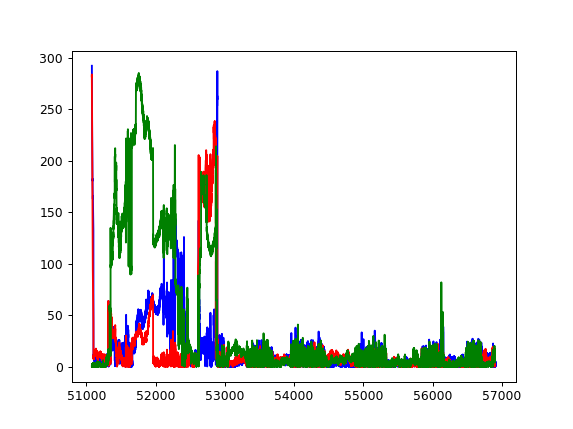

In [8]:
# Show inter-GPS distance
%matplotlib notebook
plt.figure(2)
start = 600
stop = -1
plt.plot(time_gps_fb[start:stop], abs(distance_gps_fb[start:stop]-np.ones_like(distance_gps_fb[start:stop])*Dist_GPS_12)*1000, color='b')
plt.plot(time_gps_fm[start:stop], abs(distance_gps_fm[start:stop]-np.ones_like(distance_gps_fm[start:stop])*Dist_GPS_13)*1000, color='r')
plt.plot(time_gps_mb[start:stop], abs(distance_gps_mb[start:stop]-np.ones_like(distance_gps_mb[start:stop])*Dist_GPS_23)*1000, color='g')

<IPython.core.display.Javascript object>


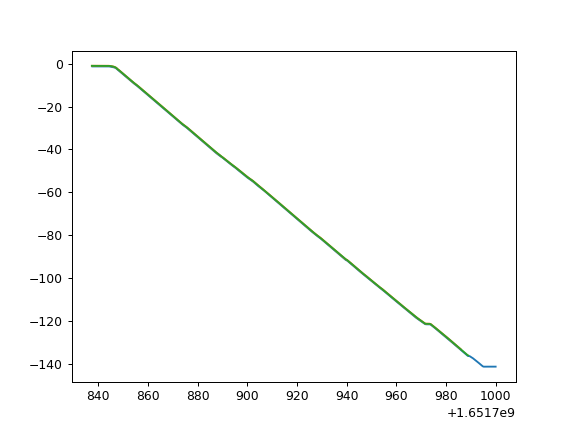

In [8]:
# Show total station data
#print(trimble_1[0])
plt.figure(0)
start = 0
end = 400
plt.plot(time_trimble_1[start:end], np.array(trimble_1)[0,start:end])
plt.plot(time_trimble_2[start:end], np.array(trimble_2)[0,start:end])
plt.plot(time_trimble_3[start:end], np.array(trimble_3)[0,start:end])

(-5183195.902221367, -5183106.39187667, 326341.0353358924, 326406.4747532486)

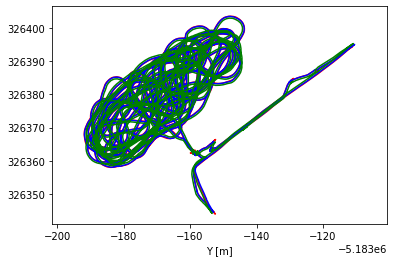

In [3]:
# Plot GPS trajectory in 2D

#print(len(GPS_front_utm_data_arr))
plt.figure(1)
interval_1 = [600,-100]
interval_2 = [600,-100]
interval_3 = [600,-100]
plt.plot(-GPS_front_utm_data_arr[interval_1[0]:interval_1[1],1], GPS_front_utm_data_arr[interval_1[0]:interval_1[1],2], color="r")
plt.plot(-GPS_back_utm_data_arr[interval_2[0]:interval_2[1],1], GPS_back_utm_data_arr[interval_2[0]:interval_2[1],2], color="b")
plt.plot(-GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],1], GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],2], color="g")
plt.xlabel('X [m]')
plt.xlabel('Y [m]')
plt.axis("equal")
#plt.savefig("GPS_trajectory.jpg")

<IPython.core.display.Javascript object>


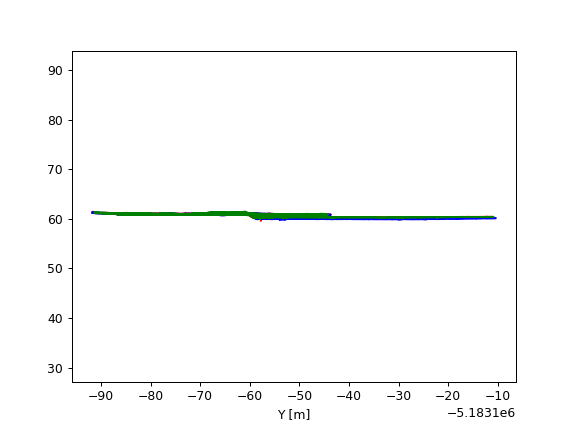

(-5183195.902221367, -5183106.39187667, 59.491969999999995, 61.545230000000004)

In [6]:
# Plot GPS trajectory in 2D
%matplotlib notebook
#print(len(GPS_front_utm_data_arr))
plt.figure(1)
interval_1 = [600,-100]
interval_2 = [600,-100]
interval_3 = [600,-100]
plt.plot(-GPS_front_utm_data_arr[interval_1[0]:interval_1[1],1], GPS_front_utm_data_arr[interval_1[0]:interval_1[1],3], color="r")
plt.plot(-GPS_back_utm_data_arr[interval_2[0]:interval_2[1],1], GPS_back_utm_data_arr[interval_2[0]:interval_2[1],3], color="b")
plt.plot(-GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],1], GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],3], color="g")
plt.xlabel('X [m]')
plt.xlabel('Y [m]')
plt.axis("equal")
#plt.savefig("GPS_trajectory.jpg")

In [10]:
# Save inter-GPS distance into csv file
tfu = importlib.reload(tfu)
ttfu = importlib.reload(ttfu)

#interval = [10000,-1]  # 20220307
interval = [0,-1]
ttfu.Convert_inter_distance_to_csv(time_gps_fb[interval[0]:interval[1]], distance_gps_fb[interval[0]:interval[1]], "./data/gps12_distance.csv")
ttfu.Convert_inter_distance_to_csv(time_gps_fm[interval[0]:interval[1]], distance_gps_fm[interval[0]:interval[1]], "./data/gps13_distance.csv")
ttfu.Convert_inter_distance_to_csv(time_gps_mb[interval[0]:interval[1]], distance_gps_mb[interval[0]:interval[1]], "./data/gps23_distance.csv")

Conversion done !
Conversion done !
Conversion done !


<IPython.core.display.Javascript object>


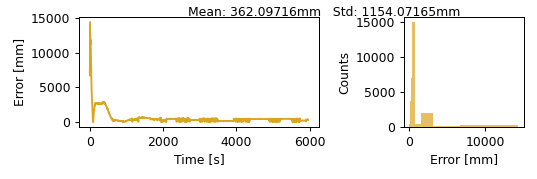

/home/norlab/python-env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


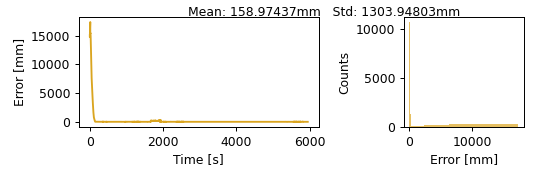

/home/norlab/python-env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


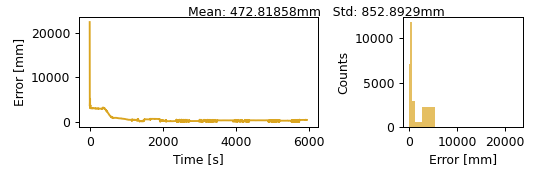

/home/norlab/python-env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [20]:
# Plot inter-GPS distance 
%matplotlib notebook
import scripts.theodolite_plot_function as ptfu
ptfu = importlib.reload(ptfu)

save_fig = False
name_file = "./figs/distance_gps12.jpg"
ptfu.plot_gps_distance(time_gps_fb, distance_gps_fb, Dist_GPS_12, 20, save_fig, name_file)

save_fig = False
name_file = "./figs/distance_gps13.jpg"
ptfu.plot_gps_distance(time_gps_fm, distance_gps_fm, Dist_GPS_13, 20, save_fig, name_file)

save_fig = False
name_file = "./figs/distance_gps23.jpg"
ptfu.plot_gps_distance(time_gps_mb, distance_gps_mb, Dist_GPS_23, 20, save_fig, name_file)

<IPython.core.display.Javascript object>


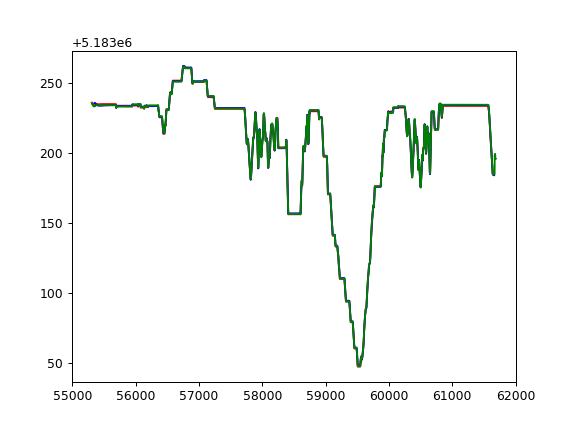

In [17]:
# Plot GPS trajectories
%matplotlib notebook
GPS_front_utm_data_array = np.array(GPS_front_utm_data)
GPS_back_utm_data_array = np.array(GPS_back_utm_data)
GPS_middle_utm_data_array = np.array(GPS_middle_utm_data)

plt.figure(1)
plt.plot(GPS_front_utm_data_array[:,0],GPS_front_utm_data_array[:,1], color='r')
plt.plot(GPS_back_utm_data_array[:,0],GPS_back_utm_data_array[:,1], color='b')
plt.plot(GPS_middle_utm_data_array[:,0],GPS_middle_utm_data_array[:,1], color='g')
plt.show()

In [5]:
# Convert point data to csv file
ttfu = importlib.reload(ttfu)

# Trajectory total station (time, point data) x3
ttfu.Convert_datap_to_csv(time_trimble_1, np.array(trimble_1).T, "./data/trimble1.csv")
ttfu.Convert_datap_to_csv(time_trimble_2, np.array(trimble_2).T, "./data/trimble2.csv")
ttfu.Convert_datap_to_csv(time_trimble_3, np.array(trimble_3).T, "./data/trimble3.csv")

#ttfu.Convert_datap_to_csv(time_trimble_1[0:400], np.array(trimble_1[:,0:400]).T, "./data/trimble1.csv")
#ttfu.Convert_datap_to_csv(time_trimble_2[0:400], np.array(trimble_2[:,0:400]).T, "./data/trimble2.csv")
#ttfu.Convert_datap_to_csv(time_trimble_3[0:400], np.array(trimble_3[:,0:400]).T, "./data/trimble3.csv")

Conversion done !
Conversion done !
Conversion done !


In [10]:
# Trajectory GPS (time, point data) x3
interval_1 = [0,-1]
interval_2 = [0,-1]
interval_3 = [0,-1]
ttfu.Convert_datap_to_csv(GPS_front_utm_data_arr[interval_1[0]:interval_1[1],0], GPS_front_utm_data_arr[interval_1[0]:interval_1[1],1:4], "./data/gpsfront.csv")
ttfu.Convert_datap_to_csv(GPS_back_utm_data_arr[interval_2[0]:interval_2[1],0], GPS_back_utm_data_arr[interval_2[0]:interval_2[1],1:4], "./data/gpsback.csv")
ttfu.Convert_datap_to_csv(GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],0], GPS_middle_utm_data_arr[interval_3[0]:interval_3[1],1:4], "./data/gpsmiddle.csv")

Conversion done !
Conversion done !
Conversion done !
